In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, mb_magnitude
import pandas as pd

# reading in electron counts file: day ### of year ####
file = 'hhrr1993308.txt'
t, r1, r2, r3, r4 = read(file)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\SAMPEX_Data\\hhrr1993308.txt'

In [ ]:
# find microburst times and N_100, SSD1, SSD4 counts using algorithm
t_microburst, N_100_microburst, r1_microburst, r4_microburst, mb_index, MB_mask, N_100, A_500 = mb_finder(t, r1, r2, r3, r4)

In [ ]:
# calculation of B_3 bin percentiles
y_microburst, B_3_microburst, B_3 = mb_magnitude(N_100, N_100_microburst, A_500)

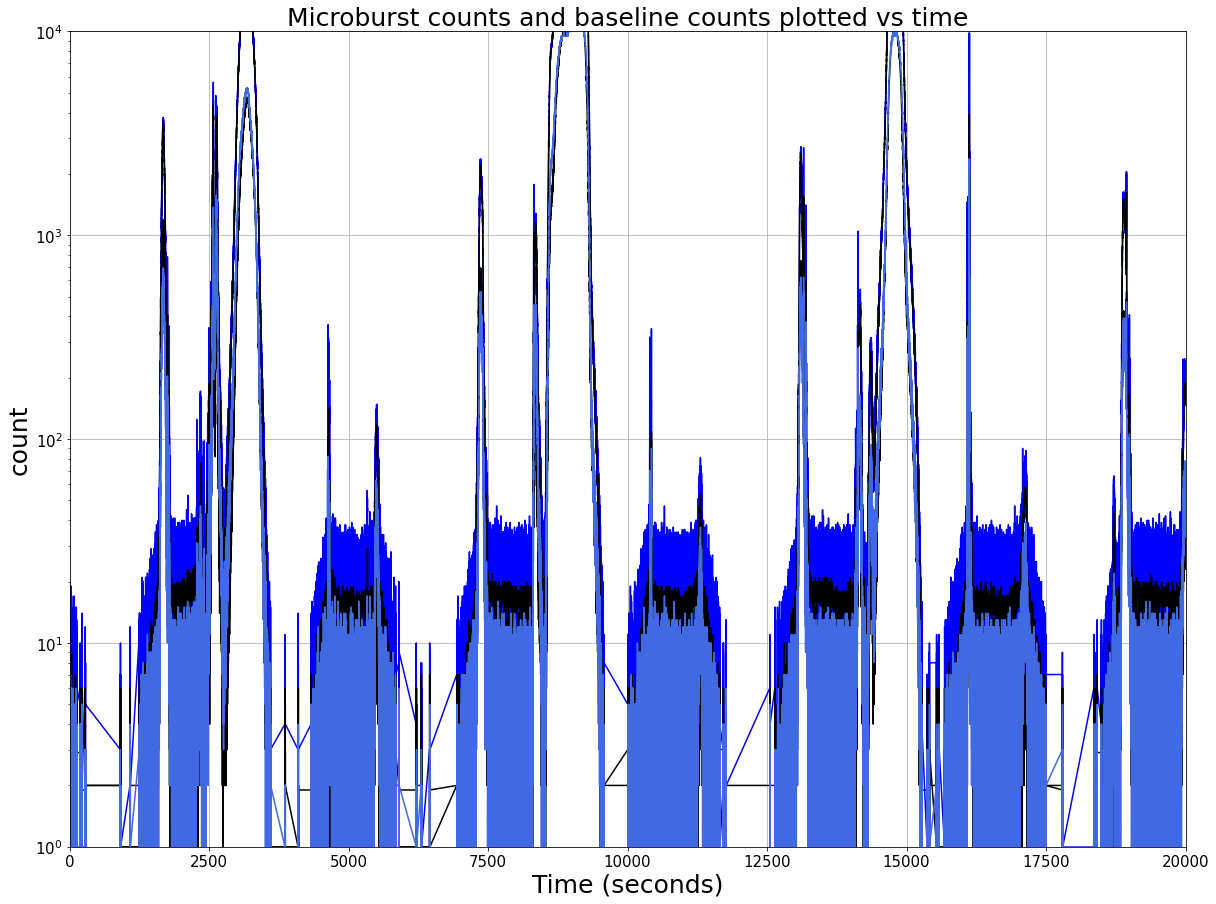

In [44]:
# plot microburst electron counts and baseline vs time
i = 550            # focus microburst
middle_point = t_microburst[i]
plotrange = 50     # data range around microburst

plt.figure(figsize = (20,15))
plt.title('Microburst counts and baseline counts plotted vs time', fontsize = 25)
plt.semilogy(t, N_100, 'b-', t, B_3, 'k-')
plt.semilogy(t, r1, 'k-', t, r4, 'royalblue')  # isotropy check
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('count', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
middle_point = 5000
#plt.xlim(middle_point-plotrange, middle_point+plotrange)
plt.xlim(0, 20000)
#plt.ylim(1, 10000)
plt.grid(True)
plt.show()

In [61]:
# calculation of the isotropy indices of electron counts
iso_indices = []        # for data analysis purposes
iso_indices_plot = []   # for plotting purposes

for i, ii in zip(r1_microburst, r4_microburst):
    if ii >= 20 and i >= 20:
        if  ii != 0 and ii > i:
            iso_index = i/ii
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  i != 0 and i > ii:
            iso_index = ii/i
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
        elif  ii == i:
            iso_index = 1
            iso_indices.append(iso_index)
            iso_indices_plot.append(iso_index)
    else:
        # when counts are too low, they do not contribute to the isotropy day-average isotropy index
        iso_index = 0
        iso_indices_plot.append(iso_index)

iso_indices = np.array(iso_indices)
iso_indices_plot = np.array(iso_indices_plot)

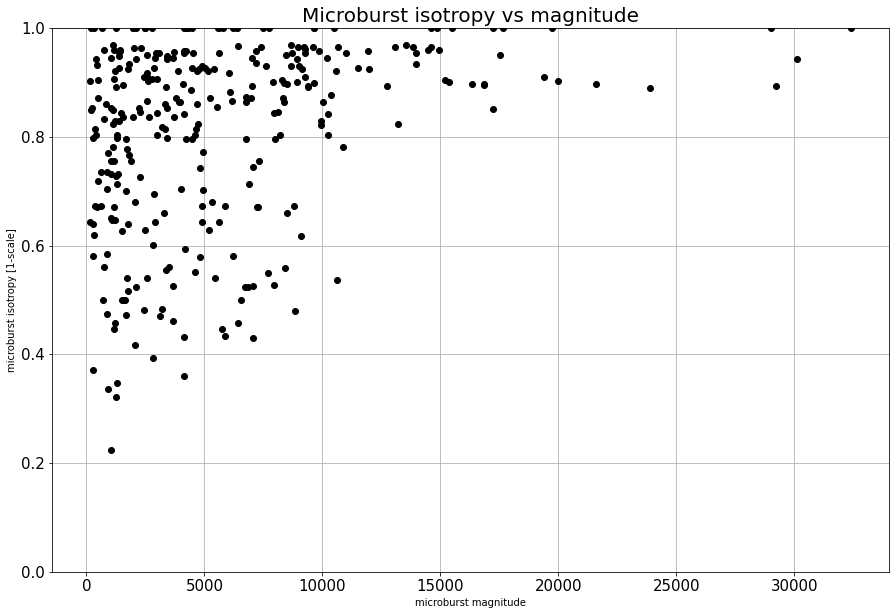

In [62]:
# plot microburst isotropy vs magnitude
i = 400
plotrange = 50000

plt.figure(figsize = (15,10))
plt.title('Microburst isotropy vs magnitude', fontsize = 20)
plt.plot(y_microburst, iso_indices_plot, 'ko')
plt.xlabel('microburst magnitude', fontsize = 10)
plt.ylabel('microburst isotropy [1-scale]', fontsize = 10)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim(0, 1)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
plt.grid(True)
plt.show()

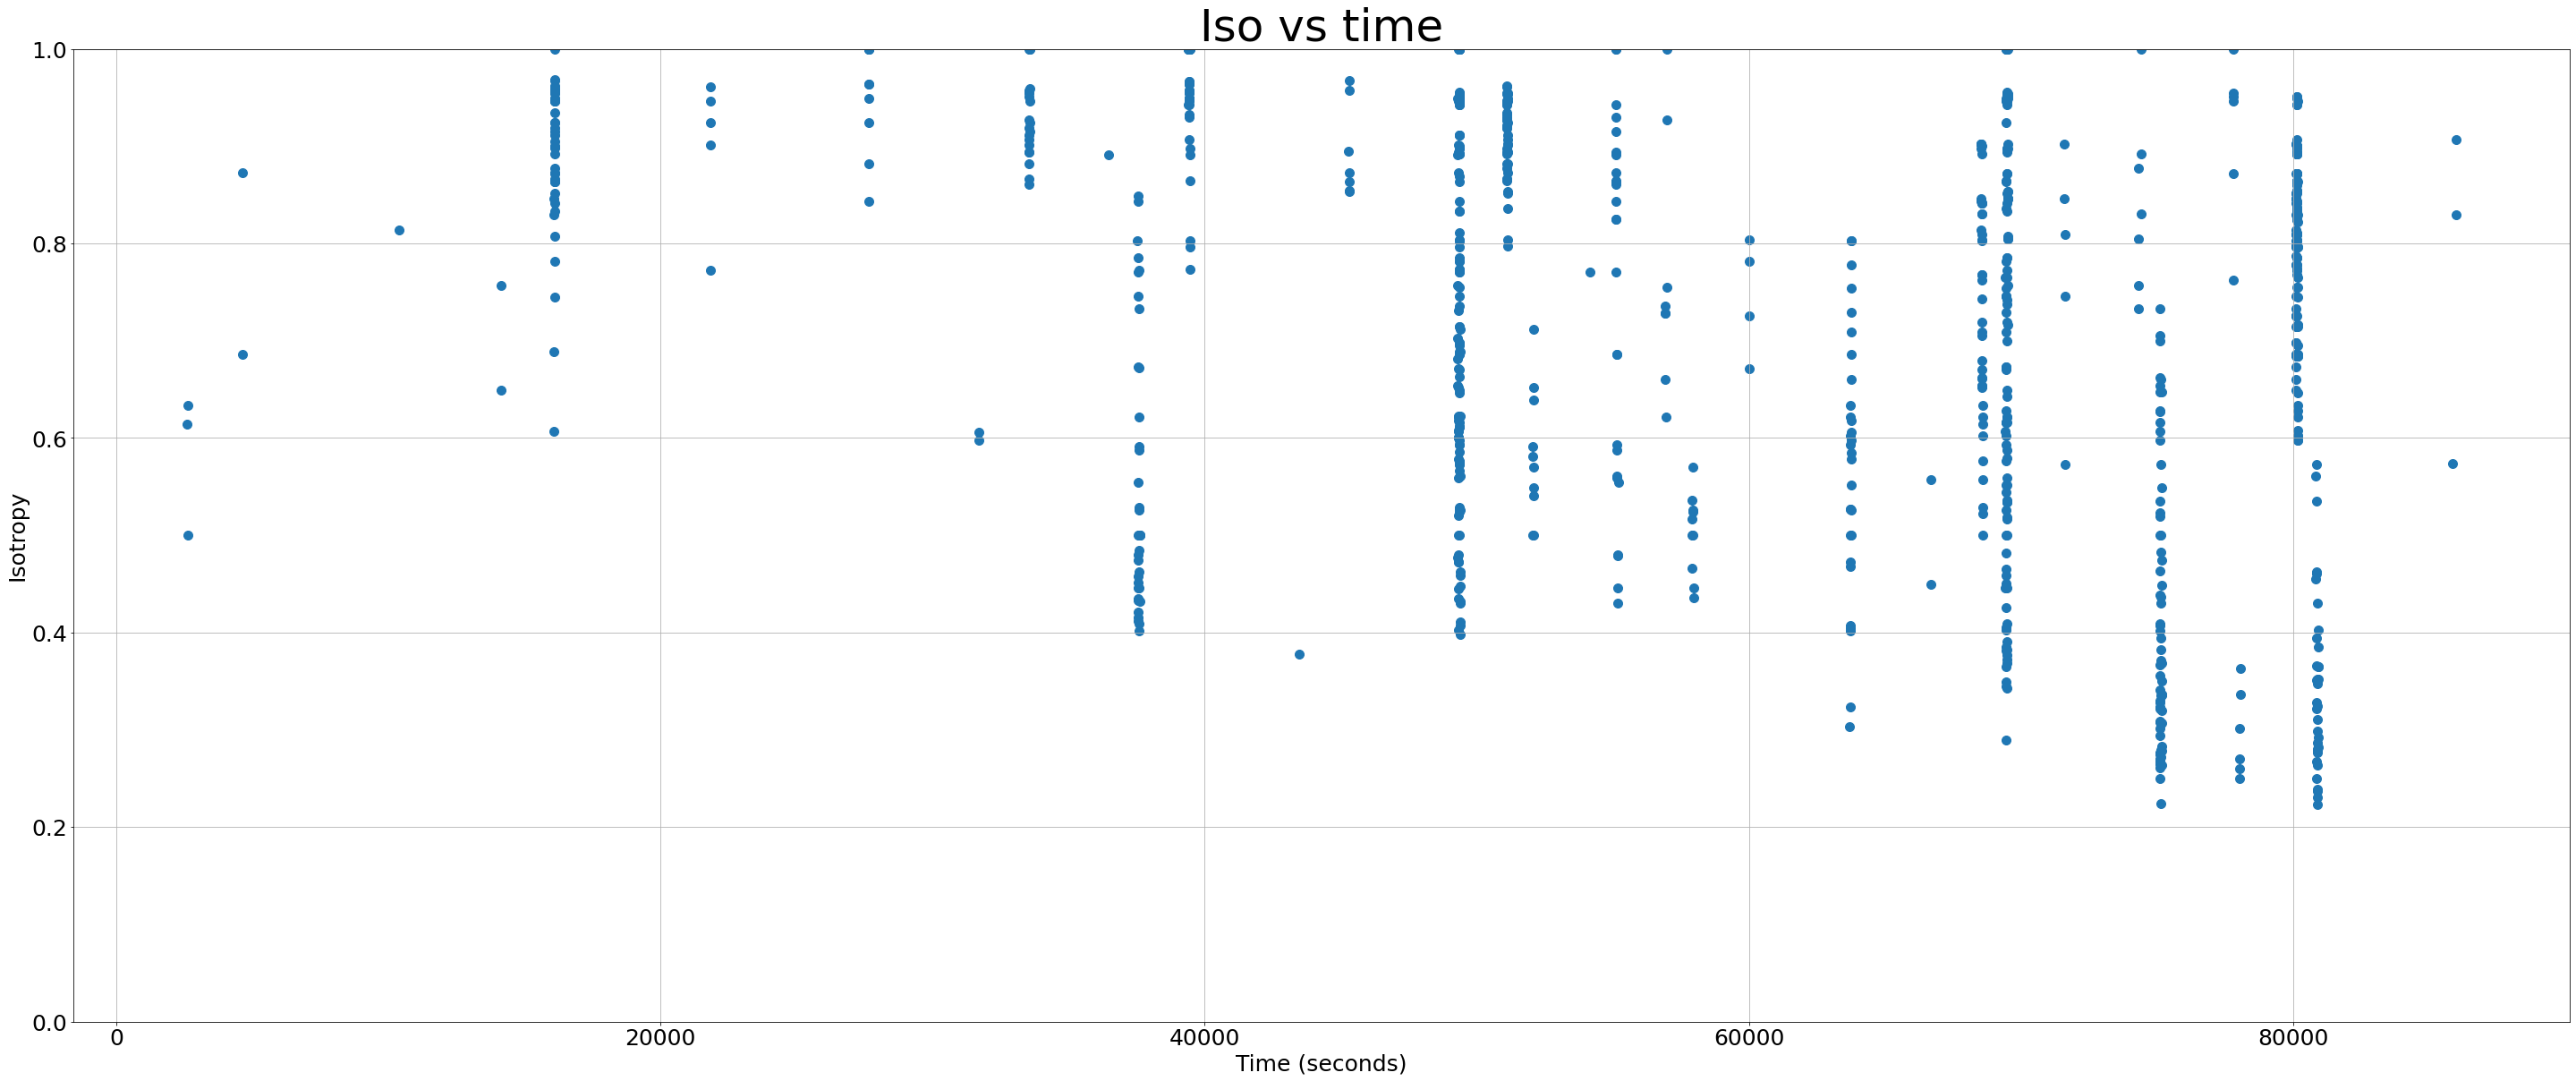

In [8]:
# isotropy plot
plt.figure(figsize = (50,20))
plt.title('Iso vs time', fontsize = 50)
plt.scatter(t_microburst, iso_indices_plot, s = 100)
plt.xlabel('Time (seconds)', fontsize = 25)
plt.ylabel('Isotropy', fontsize = 25)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [9]:
mask = iso_indices == 0.5

In [10]:
print(t_microburst[mask])
print(r1_microburst[mask])
print(r4_microburst[mask])

[ 2624.2 37570.7 37577.4 37605.3 37607.1 37608.  49330.9 49343.3 52066.9
 52071.6 57904.1 57934.7 63741.3 63748.1 68599.2 69465.  69472.3 75116.3
 75121.3]
[ 456  392  688  392  528  376  560 1120  560  784  344  944 2112 2496
  592 2496 2368  816 1120]
[ 912  784 1376  784 1056  752 1120 2240 1120 1568  688 1888 4224 4992
  296 4992 4736 1632 2240]


In [11]:
# plot microburst magnitude vs time
#i = 400
#plotrange = 50000

#plt.figure(figsize = (20,15))
#plt.title('Microburst magnitude vs time', fontsize = 25)
#plt.semilogy(t_microburst, y_microburst, 'ko')
#plt.xlabel('Time (seconds)', fontsize = 20)
#plt.ylabel('count', fontsize = 20)
#plt.xticks(fontsize = 15)
#plt.yticks(fontsize = 15)
#plt.xlim(t_microburst[i]-plotrange, t_microburst[i]+plotrange)
#plt.grid(True)
#plt.show()